# Data exploration with pandas and sklearn

## The goal of this homework is to discover structure in an unlabeled dataset. The observations in this dataset belong to several different clusters. The specific goal is to identify how many clusters there are and to which cluster each point belongs.

## Question 1 (5 points). Load the dataset into a pandas dataframe. Each row represents a single observation; the values in the columns are numeric features recorded for that observation (in other words, this is a 'tidy' dataset). How many rows and columns are there? What is the dimension of this dataset? In other words, how many different features are there for each observation?

In [39]:
# you could start with something like this...
%matplotlib inline
import matplotlib.pyplot as plt # for plotting
import pandas as pd # pandas

datafile = 'data/dataset.csv'

df = pd.read_csv(datafile) # df for dataframe but you can call it whatever you like

numrows = len(df.index)
numcols = len(df.columns)

print("There are " + str(numrows) + " observations in the dataset.")
print("There are " + str(numcols) + " features per observation in the dataset.")


There are 496 observations in the dataset.
There are 10 features per observation in the dataset.


## Question 2 (5 points). Make a scatter plot of `dim1` versus `dim2`, ie the first column versus the second one. How many clusters do you see in this plot?

There are 3 clusters in this scatter plot.


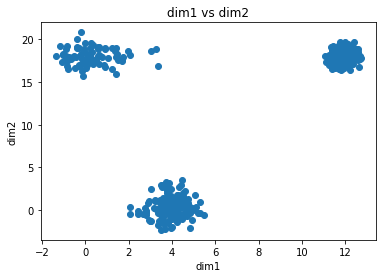

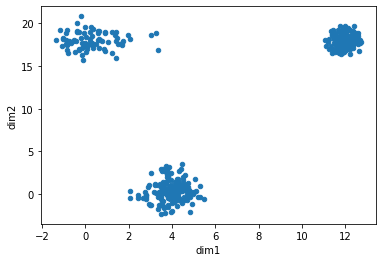

In [56]:
# You could use either 
#
#plt.scatter(xvals, yvals) #with appropriate choices for xvals and yvals (see lecture 10 for examples) 

x_df = df[df.columns[0]]
y_df = df[df.columns[1]]

plt.scatter(x_df, y_df)
plt.title('dim1 vs dim2')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])

# or
#
#df.plot.scatter(...) #filling in the "..."

df.plot.scatter(x='dim1', y='dim2')

# recall that df['dim1'] returns the single column of values in the 'dim1' column
#

print("There are 3 clusters in this scatter plot.")

## Question 3 (15 points). Perform principal components analysis (PCA) on the dataset, following along with the example in the lectures10and11 notebook. What fraction of the variation in the dataset is captured by the first two components? Make a plot of the first component against the second component. Now how many clusters do you see in the data? (2 points extra credit if you standardize the data first using `sklearn.preprocessing.StandardScaler`; see the lectures10and11 notebook for an example of how to do that.)

pca raw explained variance:  [0.77076129 0.15980486]
pca2 raw explained variance:  [0.65307489 0.19061062]


Text(0, 0.5, 'PCA2')

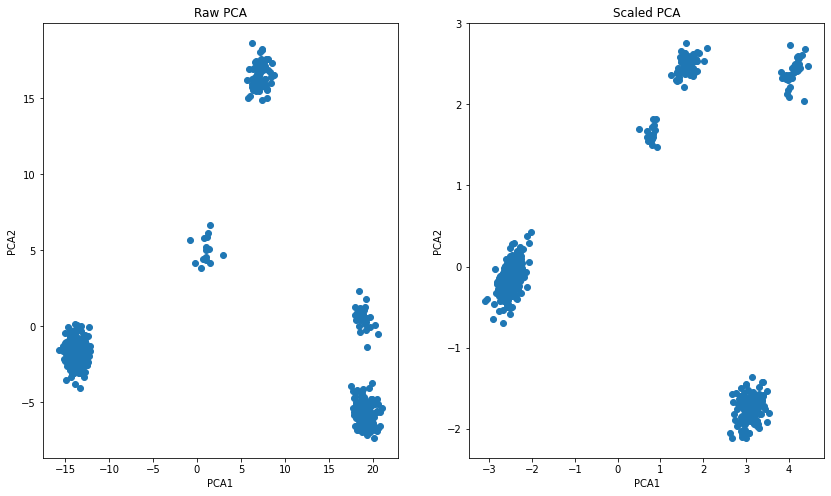

In [107]:
# start by importing the PCA class
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# standardize the data in df
scaler = StandardScaler() # create the sklearn object
scaler.fit(df)
df_scaled = scaler.transform(df)

# 1. create and configure the model (call it "pca")
pca = PCA(n_components=2)
pca2 = PCA(n_components=2)

# 2. fit the model to the data (use pca.fit(...) )
#df_scaled = scaler.transform(df)
pca.fit(df)
pca2.fit(df_scaled)

# 3. look at the model's explained_variance_ratio_ (i.e., pca.explained_variance_ratio_ where pca
#    is what you called the PCA object) to see how much variance the top two components capture.
print('pca raw explained variance: ', pca.explained_variance_ratio_)
print('pca2 raw explained variance: ', pca2.explained_variance_ratio_)

# 4. transform the data to a new array, call it "X_pca" (use pca.transform(...) )
X_pca = pca.transform(df)
X_pca2 = pca2.transform(df_scaled)

# 5. Plot the first two components, as we did in class.
plt.figure(figsize=(14,8)) # set figure size

# create multi-panel plot with 1 row and 2 columns
nrows = 1
ncols = 2

plt.subplot(nrows, ncols, 1)
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.title('Raw PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.subplot(nrows, ncols, 2)
plt.scatter(X_pca2[:,0], X_pca2[:,1])
plt.title('Scaled PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')


## Question 4 (15 points). Use the KMeans clustering algorithm from scikit-learn to assign each point in the dataset to a cluster. Configure KMeans to find a number of clusters equal to the number that you identified visually in the PCA plot from question 3. What are the sizes of the different clusters (how many points are in each cluster)? Remake the PCA scatter plot (PC1 versus PC2) colored by the cluster labels.

cluster sizes: 0    256
1    128
2     64
3     32
4     16
Name: clusters, dtype: int64


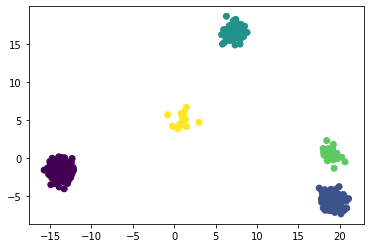

In [108]:
from sklearn.cluster import KMeans

nclust= 5 # answer from Question 3

# 1. create a KMeans object, call it kmeans; you'll need to tell it how many clusters to find
kmeans = KMeans(n_clusters=nclust)

# 2. fit the object to the data using kmeans.fit
kmeans.fit(df)

# 3. Get the list of clusters using kmeans.predict
#    Name the returned array of cluster assignments "clusters"
clusters = kmeans.predict(df)

# To get the cluster sizes, first look at the array of clusters returned by kmeans.predict
#    to see that the different values are integers between 0 and nclust-1, inclusive.

# To get the size of each cluster, you could write a for loop over the different cluster
# numbers, and inside the loop you could count how many elements in clusters array are
# equal to that cluster number. Instead, do it by creating a new column in the dataframe 
# containing the cluster assignments, and using the pandas method value_counts:

df['clusters'] = clusters # create a new column in the dataframe with the KMeans cluster assignments

print('cluster sizes:', df['clusters'].value_counts()) # handy built-in counting method for Pandas Series objects

# use this code to remake the PCA plot colored by the kmeans clusters, where "clusters" is the 
#  array returned by the kmeans.predict function  
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters )



## Question 5. (10 points) Make a 'scatter matrix' plot showing each column of the original dataset plotted against each of the other 9 columns in a big 10x10 array (like we did for the iris dataset in the lectures10and11 notebook). Notice how the number of apparent clusters in the data varies depends on which pairs of features are being plotted against one another. Color the plots using the kmeans clusters like you did in the previous question.
You could use `pd.plotting.scatter_matrix` or try importing seaborn (`import seaborn as sns`) and use `sns.pairplot`. Or (optional) try both and see which looks nicer. `sns.pairplot` has a `hue` argument that you can use for coloring by passing `hue='clusters'`. See the `pd.plotting.scatter_matrix` and `sns.pairplot` examples in the lectures10and11.ipynb jupyter notebook.

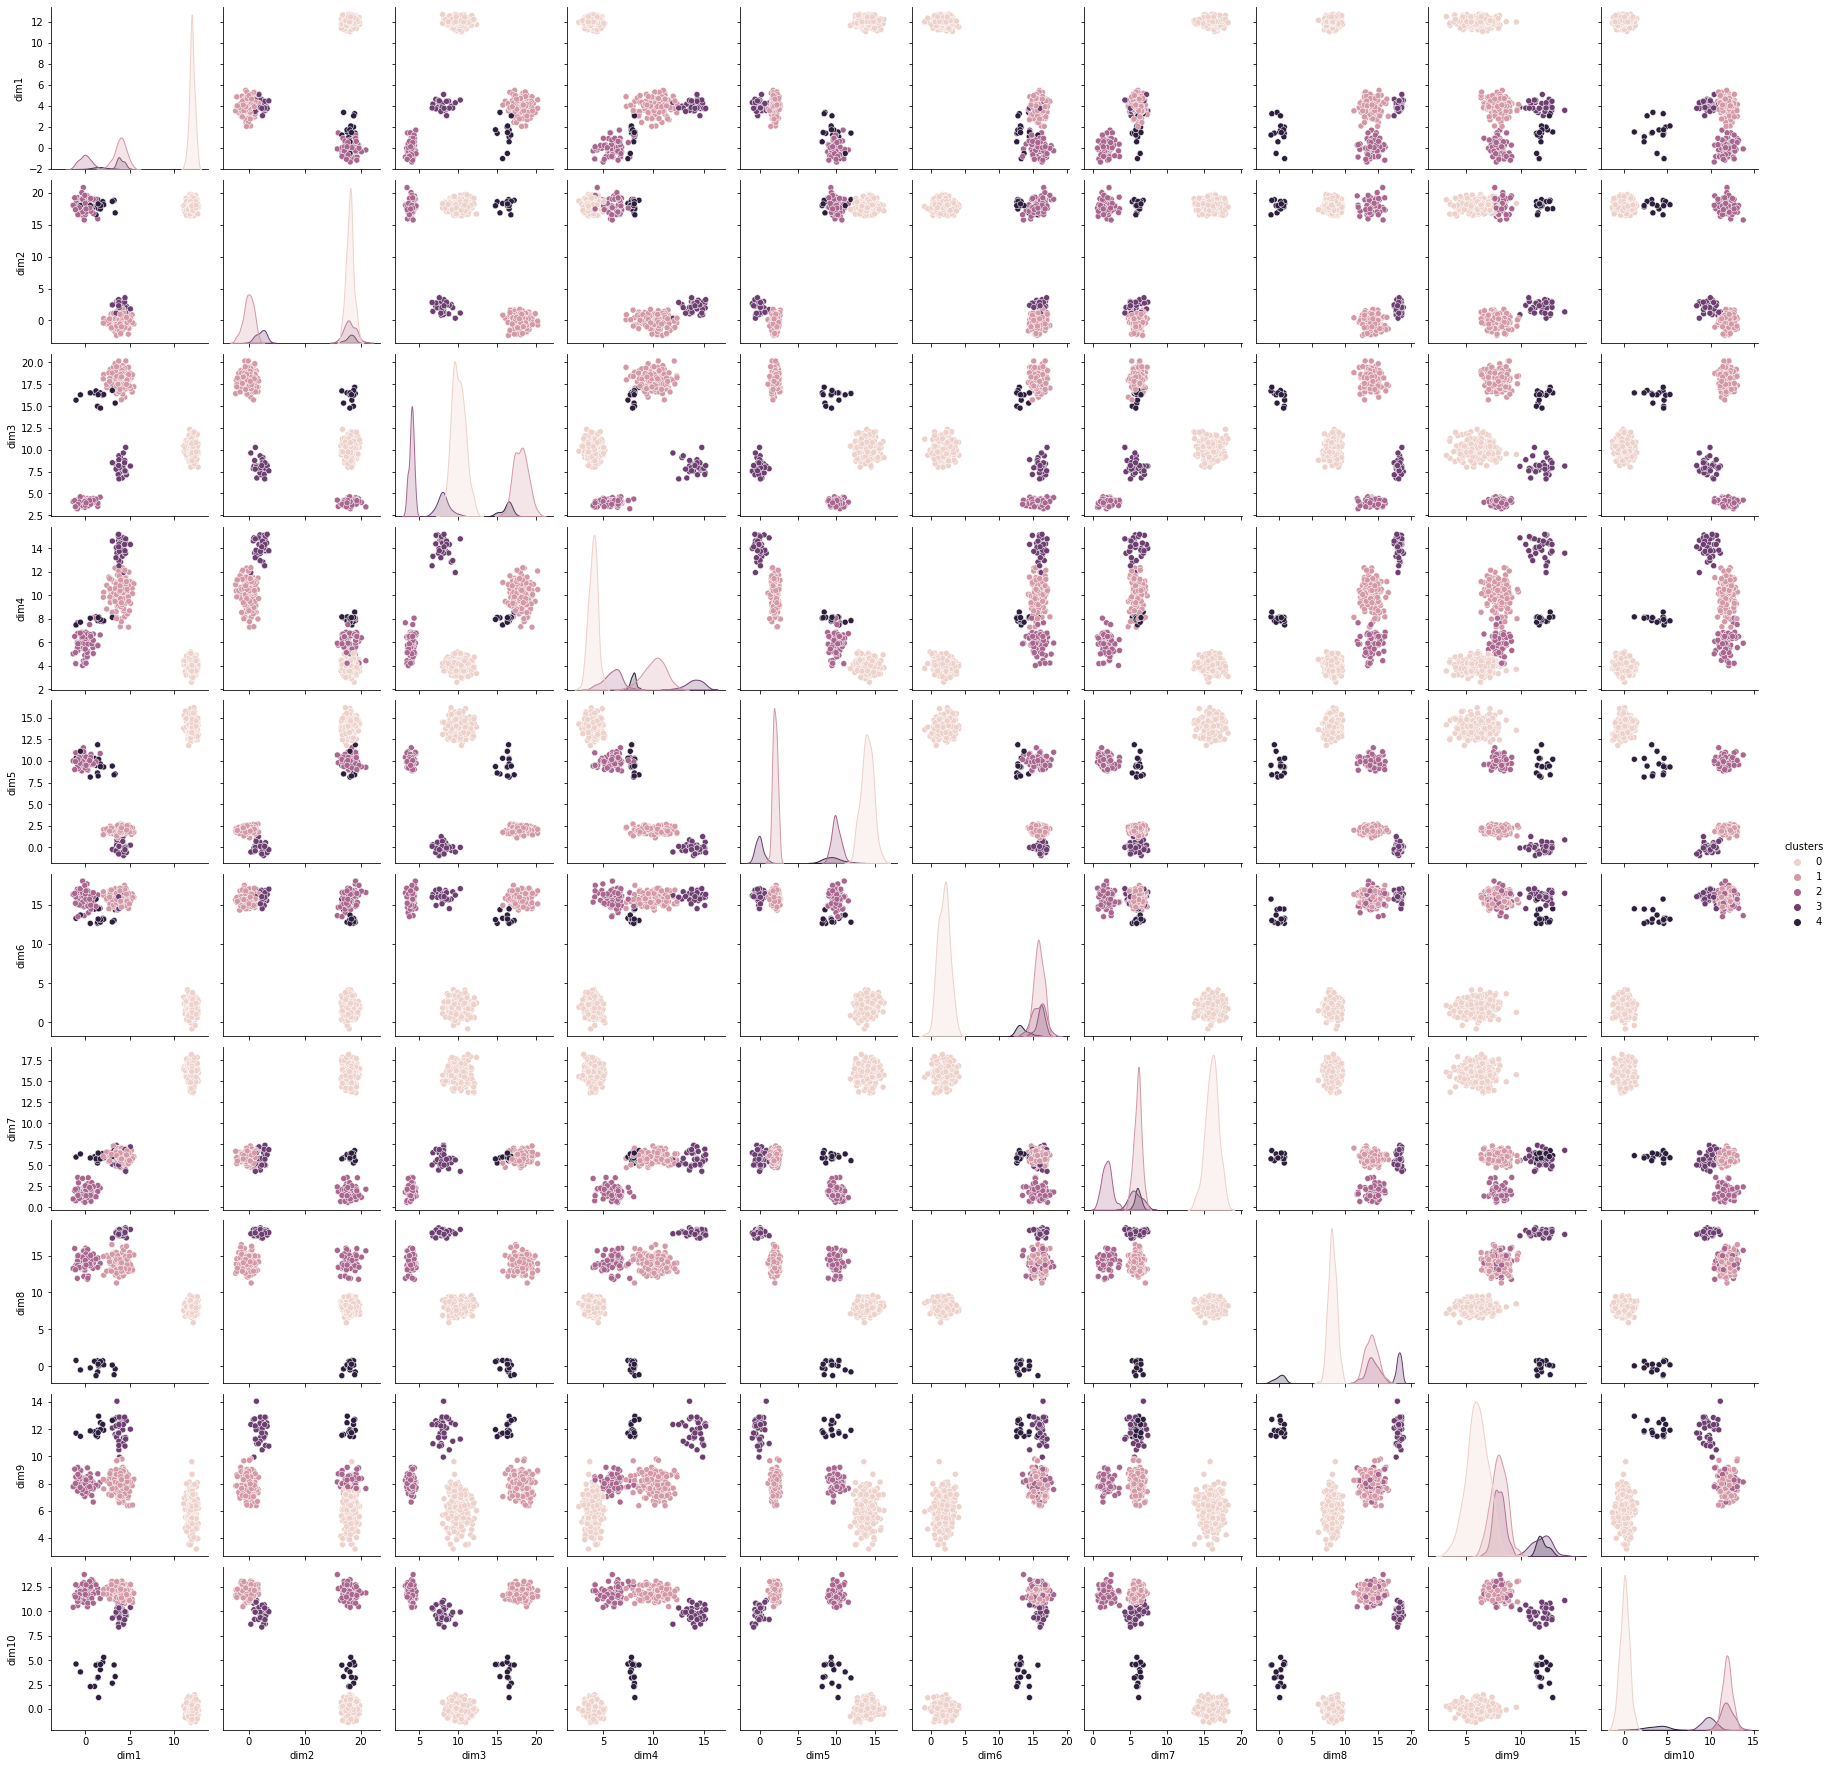

In [109]:
# put your answer here
import seaborn as sns

sns.pairplot(df, hue='clusters')

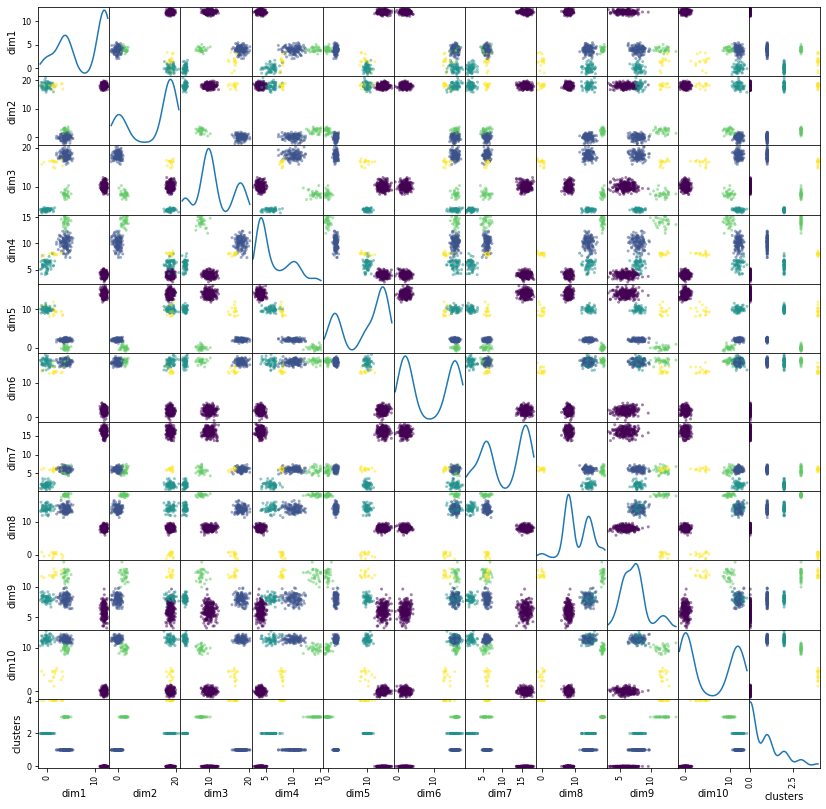

In [110]:
# and maybe also here if you are trying both and comparing...
pd.plotting.scatter_matrix(df, diagonal='kde', figsize=(14,14), c=df['clusters']);

## Question 5. (5 points of extra credit) Use the TSNE algorithm in scikit-learn to project the dataset down into 2 dimensions. How many clusters do you see in the TSNE scatter plot?

/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Number of clusters observed in tsne: 5


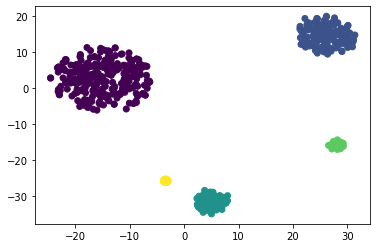

In [111]:
from sklearn.manifold import TSNE

# 1. create the TSNE object, call it tsne. Tell it you want 2 components (ie, a 2D projection)
tsne = TSNE(n_components=2)

# 2. Fit the data to the model and transform to a new array (call it X_tsne) using tsne.fit_transform
#     This combines the fit and transform steps into a single operation.
X_tsne = tsne.fit_transform(df)

# Use this matplotlib command to make a scatter plot of the two components, colored by the 
#  kmeans cluster assignments
plt.scatter( X_tsne[:,0], X_tsne[:,1], c=clusters )

numclust = 5
print("Number of clusters observed in tsne: " + str(numclust))
